# Example 4

In [1]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# algemene gegevens
x = sym.symbols('x')
EI, EA = sym.symbols('EI EA')
CV, CM, Cphi, Cuz, CN, Cux = sym.symbols('C_V C_M C_phi C_uz C_N C_ux') 
dx = 2*10**-15

# gegevens constructie
a0, a1, a2, a3, a4, a5 = 0, 2, 4.5, 7, 12, 14.5
aa = [a0, a1, a2, a3, a4, a5]
o0, o1, o2, o3, o4 = 0, sym.atan(3/4), sym.atan(3/4), sym.atan(-3/4), sym.atan(-3/4)
oo = [o0, o1, o2, o3, o4]

# sprongen in de x functie
phiBD, uzBD, uxBD, phiCF, uzCF, uxCF = sym.symbols('phi^BD u_z^BD u_x^BD phi^CF u_z^CF u_x^CF')
s1, s2 = 7+2*dx, 12+2*dx
ss = [s1, s2]

# gegevens belastingen
Fv = 20
Rv, Rh, Tr = sym.symbols('R_v R_h T_R')
VBF, HBF, TBF, VCE, HCE, TCE = sym.symbols('V^BF H^BF T^BF V^CE H^CE T^CE')
B = [Rv, Rh, Tr, VBF, HBF, TBF, VCE, HCE, TCE, Fv, -VBF, -HBF, -TBF, phiBD, uzBD, uxBD, Fv, -VCE, -HCE, -TCE, phiCF, uzCF, uxCF, Fv]
b1, b2, b3, b4, b5, b6, b7, b8 = 0, 2, 4.5, 7, 7+2*dx, 12, 12+2*dx, 14.5
bb = [b1, b1, b1, b2, b2, b2, b3, b3, b3, b4, b5, b5, b5, s1, s1, s1, b6, b7, b7, b7, s2, s2, s2, b8]
# K = 1, Fv = 2, Fh = 3, qv = 4, qh = 5, phi = 6, uz = 7, ux = 8
nn = [2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 2, 3, 1, 6, 7, 8, 2, 2, 3, 1, 6, 7, 8, 2]

In [3]:
#qz opstellen
qz = 0

#beginpunten
for i in range(len(B)):
    for j in range(len(aa)):
        if bb[i] == aa[-1]:
            if nn[i] == 1:
                qz += B[i] * sym.SingularityFunction(x,bb[i],-2)
            if nn[i] == 2:
                qz += B[i] * sym.SingularityFunction(x,bb[i],-1) * sym.cos(oo[-1])
            if nn[i] == 3:
                qz += B[i] * sym.SingularityFunction(x,bb[i],-1) * sym.sin(oo[-1])
            if nn[i] == 4:
                qz += B[i] * sym.SingularityFunction(x,bb[i],0) * sym.cos(oo[-1])
            if nn[i] == 5:
                qz += B[i] * sym.SingularityFunction(x,bb[i],0) * sym.sin(oo[-1])
            break
        else:
            if bb[i] < aa[j]:
                if nn[i] == 1:
                    qz += B[i] * sym.SingularityFunction(x,bb[i],-2)
                if nn[i] == 2:
                    qz += B[i] * sym.SingularityFunction(x,bb[i],-1) * sym.cos(oo[j-1])
                if nn[i] == 3:
                    qz += B[i] * sym.SingularityFunction(x,bb[i],-1) * sym.sin(oo[j-1])
                if nn[i] == 4:
                    qz += B[i] * sym.SingularityFunction(x,bb[i],0) * sym.cos(oo[j-1])
                if nn[i] == 5:
                    qz += B[i] * sym.SingularityFunction(x,bb[i],0) * sym.sin(oo[j-1])
                if nn[i] == 6:
                    qz += B[i] * sym.SingularityFunction(x,bb[i],-3) * EI
                if nn[i] == 7:
                    qz += B[i] * sym.SingularityFunction(x,bb[i],-4) * EI
                break

# knikpunten
for i in range(len(B)):
    for j in range(len(aa)-1):
        if bb[i] < aa[j]:
            if nn[i] == 2:
                qz += B[i] * sym.SingularityFunction(x,aa[j],-1) * (sym.cos(oo[j]) - sym.cos(oo[j-1]))
            if nn[i] == 3:
                qz += B[i] * sym.SingularityFunction(x,aa[j],-1) * (sym.sin(oo[j]) - sym.sin(oo[j-1]))
            if nn[i] == 4:
                qz += B[i] * ((sym.SingularityFunction(x,aa[j],0) + sym.SingularityFunction(x,aa[j],-1) * (aa[j] - bb[i])) * (sym.cos(oo[j]) - sym.cos(oo[j-1])))
            if nn[i] == 5:
                qz += B[i] * ((sym.SingularityFunction(x,aa[j],0) + sym.SingularityFunction(x,aa[j],-1) * (aa[j] - bb[i])) * (sym.sin(oo[j]) - sym.sin(oo[j-1])))

display(qz)

EI*phi^BD*SingularityFunction(x, 7.0, -3) + EI*phi^CF*SingularityFunction(x, 12.0, -3) + EI*u_z^BD*SingularityFunction(x, 7.0, -4) + EI*u_z^CF*SingularityFunction(x, 12.0, -4) + 0.6*H^BF*SingularityFunction(x, 2, -1) - 1.2*H^BF*SingularityFunction(x, 7, -1) + 0.6*H^BF*SingularityFunction(x, 7.0, -1) + 0.6*H^CE*SingularityFunction(x, 4.5, -1) - 1.2*H^CE*SingularityFunction(x, 7, -1) + 0.6*H^CE*SingularityFunction(x, 12.0, -1) + 0.6*R_h*SingularityFunction(x, 2, -1) - 1.2*R_h*SingularityFunction(x, 7, -1) + R_v*SingularityFunction(x, 0, -1) - 0.2*R_v*SingularityFunction(x, 2, -1) + T^BF*SingularityFunction(x, 2, -2) - T^BF*SingularityFunction(x, 7.0, -2) + T^CE*SingularityFunction(x, 4.5, -2) - T^CE*SingularityFunction(x, 12.0, -2) + T_R*SingularityFunction(x, 0, -2) + 0.8*V^BF*SingularityFunction(x, 2, -1) - 0.8*V^BF*SingularityFunction(x, 7.0, -1) + 0.8*V^CE*SingularityFunction(x, 4.5, -1) - 0.8*V^CE*SingularityFunction(x, 12.0, -1) + 16.0*SingularityFunction(x, 7, -1) + 16.0*Singulari

In [4]:
#qx opstellen
qx = 0

#beginpunten
for i in range(len(B)):
    for j in range(len(aa)):
        if bb[i] == aa[-1]:
            if nn[i] == 2:
                qx += B[i] * sym.SingularityFunction(x,bb[i],-1) * -sym.sin(oo[-1])
            if nn[i] == 3:
                qx += B[i] * sym.SingularityFunction(x,bb[i],-1) * sym.cos(oo[-1])
            if nn[i] == 4:
                qx += B[i] * sym.SingularityFunction(x,bb[i],0) * -sym.sin(oo[-1])
            if nn[i] == 5:
                qx += B[i] * sym.SingularityFunction(x,bb[i],0) * sym.cos(oo[-1])
            break
        else:
            if bb[i] < aa[j]:
                if nn[i] == 2:
                    qx += B[i] * sym.SingularityFunction(x,bb[i],-1) * -sym.sin(oo[j-1])
                if nn[i] == 3:
                    qx += B[i] * sym.SingularityFunction(x,bb[i],-1) * sym.cos(oo[j-1])
                if nn[i] == 4:
                    qx += B[i] * sym.SingularityFunction(x,bb[i],0) * -sym.sin(oo[j-1])
                if nn[i] == 5:
                    qx += B[i] * sym.SingularityFunction(x,bb[i],0) * sym.cos(oo[j-1])
                if nn[i] == 8:
                    qx += B[i] * sym.SingularityFunction(x,bb[i],-2) * EA
                break

# knikpunten
for i in range(len(B)):
    for j in range(len(aa)-1):
        if bb[i] < aa[j]:
            if nn[i] == 2:
                qx += B[i] * sym.SingularityFunction(x,aa[j],-1) * (-sym.sin(oo[j]) + sym.sin(oo[j-1]))
            if nn[i] == 3:
                qx += B[i] * sym.SingularityFunction(x,aa[j],-1) * (sym.cos(oo[j]) - sym.cos(oo[j-1]))
            if nn[i] == 4:
                qx += B[i] * ((sym.SingularityFunction(x,aa[j],0) + sym.SingularityFunction(x,aa[j],-1) * (aa[j] - bb[i])) * (-sym.sin(oo[j]) + sym.sin(oo[j-1])))
            if nn[i] == 5:
                qx += B[i] * ((sym.SingularityFunction(x,aa[j],0) + sym.SingularityFunction(x,aa[j],-1) * (aa[j] - bb[i])) * (sym.cos(oo[j]) - sym.cos(oo[j-1])))

display(qx)

EA*u_x^BD*SingularityFunction(x, 7.0, -2) + EA*u_x^CF*SingularityFunction(x, 12.0, -2) + 0.8*H^BF*SingularityFunction(x, 2, -1) - 0.8*H^BF*SingularityFunction(x, 7.0, -1) + 0.8*H^CE*SingularityFunction(x, 4.5, -1) - 0.8*H^CE*SingularityFunction(x, 12.0, -1) + R_h*SingularityFunction(x, 0, -1) - 0.2*R_h*SingularityFunction(x, 2, -1) - 0.6*R_v*SingularityFunction(x, 2, -1) + 1.2*R_v*SingularityFunction(x, 7, -1) - 0.6*V^BF*SingularityFunction(x, 2, -1) + 1.2*V^BF*SingularityFunction(x, 7, -1) - 0.6*V^BF*SingularityFunction(x, 7.0, -1) - 0.6*V^CE*SingularityFunction(x, 4.5, -1) + 1.2*V^CE*SingularityFunction(x, 7, -1) - 0.6*V^CE*SingularityFunction(x, 12.0, -1) + 12.0*SingularityFunction(x, 7, -1) + 12.0*SingularityFunction(x, 12, -1) + 12.0*SingularityFunction(x, 14.5, -1)

In [5]:
V = -sym.integrate(qz.expand(), x) + CV
M = sym.integrate(V, x) + CM
kappa = M / EI
phi = sym.integrate(kappa, x) + Cphi
uz = -sym.integrate(phi, x) + Cuz

N = -sym.integrate(qx.expand(), x) + CN
epsilon = N / EA
ux = sym.integrate(epsilon, x) + Cux

uvz = uz.subs(x,0) * sym.cos(o0)
uvx = -ux.subs(x,0) * sym.sin(o0)
for i in range(len(oo)):
    uvz += ((uz - uz.subs(x,aa[i])) * sym.SingularityFunction(x,aa[i],0) - (uz - uz.subs(x,aa[i+1])) * sym.SingularityFunction(x,aa[i+1],0)) * sym.cos(oo[i])
    uvx += -((ux - ux.subs(x,aa[i])) * sym.SingularityFunction(x,aa[i],0) - (ux - ux.subs(x,aa[i+1])) * sym.SingularityFunction(x,aa[i+1],0)) * sym.sin(oo[i])
uv = uvz + uvx

uhz = uz.subs(x,0) * sym.sin(o0)
uhx = ux.subs(x,0) * sym.cos(o0)
for i in range(len(oo)):
    uhz += ((uz - uz.subs(x,aa[i])) * sym.SingularityFunction(x,aa[i],0) - (uz - uz.subs(x,aa[i+1])) * sym.SingularityFunction(x,aa[i+1],0)) * sym.sin(oo[i])
    uhx += ((ux - ux.subs(x,aa[i])) * sym.SingularityFunction(x,aa[i],0) - (ux - ux.subs(x,aa[i+1])) * sym.SingularityFunction(x,aa[i+1],0)) * sym.cos(oo[i])
uh = uhz + uhx

display(sym.symbols('{N}='), N)
display(sym.symbols('{V}='), V)
display(sym.symbols('{M}='), M)
display(sym.symbols('{u_x}='), ux)
display(sym.symbols('{\phi}='), phi)
display(sym.symbols('{u_z}='), uz)
display(sym.symbols('{u_v}='), uv)
display(sym.symbols('{u_h}='), uh)

{N}=

C_N - EA*u_x^BD*SingularityFunction(x, 7.0, -1) - EA*u_x^CF*SingularityFunction(x, 12.0, -1) - 0.8*H^BF*SingularityFunction(x, 2, 0) + 0.8*H^BF*SingularityFunction(x, 7.0, 0) - 0.8*H^CE*SingularityFunction(x, 4.5, 0) + 0.8*H^CE*SingularityFunction(x, 12.0, 0) - R_h*SingularityFunction(x, 0, 0) + 0.2*R_h*SingularityFunction(x, 2, 0) + 0.6*R_v*SingularityFunction(x, 2, 0) - 1.2*R_v*SingularityFunction(x, 7, 0) + 0.6*V^BF*SingularityFunction(x, 2, 0) - 1.2*V^BF*SingularityFunction(x, 7, 0) + 0.6*V^BF*SingularityFunction(x, 7.0, 0) + 0.6*V^CE*SingularityFunction(x, 4.5, 0) - 1.2*V^CE*SingularityFunction(x, 7, 0) + 0.6*V^CE*SingularityFunction(x, 12.0, 0) - 12.0*SingularityFunction(x, 7, 0) - 12.0*SingularityFunction(x, 12, 0) - 12.0*SingularityFunction(x, 14.5, 0)

{V}=

C_V - EI*phi^BD*SingularityFunction(x, 7.0, -2) - EI*phi^CF*SingularityFunction(x, 12.0, -2) - EI*u_z^BD*SingularityFunction(x, 7.0, -3) - EI*u_z^CF*SingularityFunction(x, 12.0, -3) - 0.6*H^BF*SingularityFunction(x, 2, 0) + 1.2*H^BF*SingularityFunction(x, 7, 0) - 0.6*H^BF*SingularityFunction(x, 7.0, 0) - 0.6*H^CE*SingularityFunction(x, 4.5, 0) + 1.2*H^CE*SingularityFunction(x, 7, 0) - 0.6*H^CE*SingularityFunction(x, 12.0, 0) - 0.6*R_h*SingularityFunction(x, 2, 0) + 1.2*R_h*SingularityFunction(x, 7, 0) - R_v*SingularityFunction(x, 0, 0) + 0.2*R_v*SingularityFunction(x, 2, 0) - T^BF*SingularityFunction(x, 2, -1) + T^BF*SingularityFunction(x, 7.0, -1) - T^CE*SingularityFunction(x, 4.5, -1) + T^CE*SingularityFunction(x, 12.0, -1) - T_R*SingularityFunction(x, 0, -1) - 0.8*V^BF*SingularityFunction(x, 2, 0) + 0.8*V^BF*SingularityFunction(x, 7.0, 0) - 0.8*V^CE*SingularityFunction(x, 4.5, 0) + 0.8*V^CE*SingularityFunction(x, 12.0, 0) - 16.0*SingularityFunction(x, 7, 0) - 16.0*SingularityFunctio

{M}=

C_M + C_V*x - EI*phi^BD*SingularityFunction(x, 7.0, -1) - EI*phi^CF*SingularityFunction(x, 12.0, -1) - EI*u_z^BD*SingularityFunction(x, 7.0, -2) - EI*u_z^CF*SingularityFunction(x, 12.0, -2) - 0.6*H^BF*SingularityFunction(x, 2, 1) + 1.2*H^BF*SingularityFunction(x, 7, 1) - 0.6*H^BF*SingularityFunction(x, 7.0, 1) - 0.6*H^CE*SingularityFunction(x, 4.5, 1) + 1.2*H^CE*SingularityFunction(x, 7, 1) - 0.6*H^CE*SingularityFunction(x, 12.0, 1) - 0.6*R_h*SingularityFunction(x, 2, 1) + 1.2*R_h*SingularityFunction(x, 7, 1) - R_v*SingularityFunction(x, 0, 1) + 0.2*R_v*SingularityFunction(x, 2, 1) - T^BF*SingularityFunction(x, 2, 0) + T^BF*SingularityFunction(x, 7.0, 0) - T^CE*SingularityFunction(x, 4.5, 0) + T^CE*SingularityFunction(x, 12.0, 0) - T_R*SingularityFunction(x, 0, 0) - 0.8*V^BF*SingularityFunction(x, 2, 1) + 0.8*V^BF*SingularityFunction(x, 7.0, 1) - 0.8*V^CE*SingularityFunction(x, 4.5, 1) + 0.8*V^CE*SingularityFunction(x, 12.0, 1) - 16.0*SingularityFunction(x, 7, 1) - 16.0*SingularityFunc

{u_x}=

C_ux + (C_N*x - EA*u_x^BD*SingularityFunction(x, 7.0, 0) - EA*u_x^CF*SingularityFunction(x, 12.0, 0) - 0.8*H^BF*SingularityFunction(x, 2, 1) + 0.8*H^BF*SingularityFunction(x, 7.0, 1) - 0.8*H^CE*SingularityFunction(x, 4.5, 1) + 0.8*H^CE*SingularityFunction(x, 12.0, 1) - R_h*SingularityFunction(x, 0, 1) + 0.2*R_h*SingularityFunction(x, 2, 1) + 0.6*R_v*SingularityFunction(x, 2, 1) - 1.2*R_v*SingularityFunction(x, 7, 1) + 0.6*V^BF*SingularityFunction(x, 2, 1) - 1.2*V^BF*SingularityFunction(x, 7, 1) + 0.6*V^BF*SingularityFunction(x, 7.0, 1) + 0.6*V^CE*SingularityFunction(x, 4.5, 1) - 1.2*V^CE*SingularityFunction(x, 7, 1) + 0.6*V^CE*SingularityFunction(x, 12.0, 1) - 12.0*SingularityFunction(x, 7, 1) - 12.0*SingularityFunction(x, 12, 1) - 12.0*SingularityFunction(x, 14.5, 1))/EA

{\phi}=

C_phi + (C_M*x + C_V*x**2/2 - EI*phi^BD*SingularityFunction(x, 7.0, 0) - EI*phi^CF*SingularityFunction(x, 12.0, 0) - EI*u_z^BD*SingularityFunction(x, 7.0, -1) - EI*u_z^CF*SingularityFunction(x, 12.0, -1) - 0.3*H^BF*SingularityFunction(x, 2, 2) + 0.6*H^BF*SingularityFunction(x, 7, 2) - 0.3*H^BF*SingularityFunction(x, 7.0, 2) - 0.3*H^CE*SingularityFunction(x, 4.5, 2) + 0.6*H^CE*SingularityFunction(x, 7, 2) - 0.3*H^CE*SingularityFunction(x, 12.0, 2) - 0.3*R_h*SingularityFunction(x, 2, 2) + 0.6*R_h*SingularityFunction(x, 7, 2) - R_v*SingularityFunction(x, 0, 2)/2 + 0.1*R_v*SingularityFunction(x, 2, 2) - T^BF*SingularityFunction(x, 2, 1) + T^BF*SingularityFunction(x, 7.0, 1) - T^CE*SingularityFunction(x, 4.5, 1) + T^CE*SingularityFunction(x, 12.0, 1) - T_R*SingularityFunction(x, 0, 1) - 0.4*V^BF*SingularityFunction(x, 2, 2) + 0.4*V^BF*SingularityFunction(x, 7.0, 2) - 0.4*V^CE*SingularityFunction(x, 4.5, 2) + 0.4*V^CE*SingularityFunction(x, 12.0, 2) - 8.0*SingularityFunction(x, 7, 2) - 8.0*S

{u_z}=

-C_phi*x + C_uz - (C_M*x**2/2 + C_V*x**3/6 - EI*phi^BD*SingularityFunction(x, 7.0, 1) - EI*phi^CF*SingularityFunction(x, 12.0, 1) - EI*u_z^BD*SingularityFunction(x, 7.0, 0) - EI*u_z^CF*SingularityFunction(x, 12.0, 0) - 0.1*H^BF*SingularityFunction(x, 2, 3) + 0.2*H^BF*SingularityFunction(x, 7, 3) - 0.1*H^BF*SingularityFunction(x, 7.0, 3) - 0.1*H^CE*SingularityFunction(x, 4.5, 3) + 0.2*H^CE*SingularityFunction(x, 7, 3) - 0.1*H^CE*SingularityFunction(x, 12.0, 3) - 0.1*R_h*SingularityFunction(x, 2, 3) + 0.2*R_h*SingularityFunction(x, 7, 3) - R_v*SingularityFunction(x, 0, 3)/6 + 0.0333333333333333*R_v*SingularityFunction(x, 2, 3) - T^BF*SingularityFunction(x, 2, 2)/2 + T^BF*SingularityFunction(x, 7.0, 2)/2 - T^CE*SingularityFunction(x, 4.5, 2)/2 + T^CE*SingularityFunction(x, 12.0, 2)/2 - T_R*SingularityFunction(x, 0, 2)/2 - 0.133333333333333*V^BF*SingularityFunction(x, 2, 3) + 0.133333333333333*V^BF*SingularityFunction(x, 7.0, 3) - 0.133333333333333*V^CE*SingularityFunction(x, 4.5, 3) + 0.1

{u_v}=

C_uz + (-C_phi*x - (C_M*x**2/2 + C_V*x**3/6 - EI*phi^BD*SingularityFunction(x, 7.0, 1) - EI*phi^CF*SingularityFunction(x, 12.0, 1) - EI*u_z^BD*SingularityFunction(x, 7.0, 0) - EI*u_z^CF*SingularityFunction(x, 12.0, 0) - 0.1*H^BF*SingularityFunction(x, 2, 3) + 0.2*H^BF*SingularityFunction(x, 7, 3) - 0.1*H^BF*SingularityFunction(x, 7.0, 3) - 0.1*H^CE*SingularityFunction(x, 4.5, 3) + 0.2*H^CE*SingularityFunction(x, 7, 3) - 0.1*H^CE*SingularityFunction(x, 12.0, 3) - 0.1*R_h*SingularityFunction(x, 2, 3) + 0.2*R_h*SingularityFunction(x, 7, 3) - R_v*SingularityFunction(x, 0, 3)/6 + 0.0333333333333333*R_v*SingularityFunction(x, 2, 3) - T^BF*SingularityFunction(x, 2, 2)/2 + T^BF*SingularityFunction(x, 7.0, 2)/2 - T^CE*SingularityFunction(x, 4.5, 2)/2 + T^CE*SingularityFunction(x, 12.0, 2)/2 - T_R*SingularityFunction(x, 0, 2)/2 - 0.133333333333333*V^BF*SingularityFunction(x, 2, 3) + 0.133333333333333*V^BF*SingularityFunction(x, 7.0, 3) - 0.133333333333333*V^CE*SingularityFunction(x, 4.5, 3) + 0.

{u_h}=

C_ux - 0.2*(-(2*C_N - 2*R_h)/EA + (C_N*x - EA*u_x^BD*SingularityFunction(x, 7.0, 0) - EA*u_x^CF*SingularityFunction(x, 12.0, 0) - 0.8*H^BF*SingularityFunction(x, 2, 1) + 0.8*H^BF*SingularityFunction(x, 7.0, 1) - 0.8*H^CE*SingularityFunction(x, 4.5, 1) + 0.8*H^CE*SingularityFunction(x, 12.0, 1) - R_h*SingularityFunction(x, 0, 1) + 0.2*R_h*SingularityFunction(x, 2, 1) + 0.6*R_v*SingularityFunction(x, 2, 1) - 1.2*R_v*SingularityFunction(x, 7, 1) + 0.6*V^BF*SingularityFunction(x, 2, 1) - 1.2*V^BF*SingularityFunction(x, 7, 1) + 0.6*V^BF*SingularityFunction(x, 7.0, 1) + 0.6*V^CE*SingularityFunction(x, 4.5, 1) - 1.2*V^CE*SingularityFunction(x, 7, 1) + 0.6*V^CE*SingularityFunction(x, 12.0, 1) - 12.0*SingularityFunction(x, 7, 1) - 12.0*SingularityFunction(x, 12, 1) - 12.0*SingularityFunction(x, 14.5, 1))/EA)*SingularityFunction(x, 2, 0) - 0.8*(-(14.5*C_N - EA*u_x^BD - EA*u_x^CF - 4.0*H^BF - 6.0*H^CE - 12.0*R_h - 1.5*R_v + 3.0*V^BF - 1.5*V^CE - 120.0)/EA + (C_N*x - EA*u_x^BD*SingularityFunction(

In [6]:
# 3 reactiekrachten + 6 knoopkrachten + 6 vervormingssprongen + 6 integratieconstanten = 21 voorwaarden
Eq1 = sym.Eq(N.subs(x,0-dx),0)
Eq2 = sym.Eq(N.subs(x,a3),0)
Eq3 = sym.Eq(N.subs(x,a4),0)
Eq4 = sym.Eq(N.subs(x,a5),0)
Eq5 = sym.Eq(V.subs(x,0-dx),0)
Eq6 = sym.Eq(V.subs(x,a3),0)
Eq7 = sym.Eq(V.subs(x,a4),0)
Eq8 = sym.Eq(V.subs(x,a5),0)
Eq9 = sym.Eq(M.subs(x,0-dx),0)
Eq10 = sym.Eq(M.subs(x,a3),0)
Eq11 = sym.Eq(M.subs(x,a4),0)
Eq12 = sym.Eq(M.subs(x,a5),0)
Eq13 = sym.Eq(phi.subs(x,0),0)
Eq14 = sym.Eq(uv.subs(x,0),0)
Eq15 = sym.Eq(uh.subs(x,0),0)
Eq16 = sym.Eq(phi.subs(x,s1+dx)-phi.subs(x,a1),0)
Eq17 = sym.Eq(phi.subs(x,s2+dx)-phi.subs(x,a2),0)
Eq18 = sym.Eq(uv.subs(x,s1)-uv.subs(x,a1),0)
Eq19 = sym.Eq(uv.subs(x,s2)-uv.subs(x,a2),0)
Eq20 = sym.Eq(uh.subs(x,s1)-uh.subs(x,a1),0)
Eq21 = sym.Eq(uh.subs(x,s2)-uh.subs(x,a2),0)

In [7]:
sol = sym.solve((Eq1,Eq2,Eq3,Eq4,Eq5,Eq6,Eq7,Eq8,Eq9,Eq10,Eq11,Eq12,Eq13,Eq14,Eq15,Eq16,Eq17,Eq18,Eq19,Eq20,Eq21),(Rv,Rh,Tr,VBF,HBF,TBF,VCE,HCE,TCE,phiBD,uzBD,uxBD,phiCF,uzCF,uxCF,CN,CV,CM,Cphi,Cuz,Cux))
display(sol)

{C_M: 0.0,
 C_N: 0.0,
 C_V: 0.0,
 C_phi: 0.0,
 C_ux: 0.0,
 C_uz: 0.0,
 H^BF: 0.0,
 H^CE: 0.0,
 R_h: 0.0,
 R_v: -60.0000000000000,
 T^BF: -80.0000000000000,
 T^CE: -40.0000000000000,
 T_R: 360.000000000000,
 V^BF: 20.0000000000000,
 V^CE: 20.0000000000000,
 phi^BD: -350.0/EI,
 phi^CF: 100.0/EI,
 u_x^BD: 2.5e-27*(1.632e+30*EA - 1.008e+28*EI)/(EA*EI),
 u_x^CF: 1.0e-28*(-1.84e+31*EA + 7.68000000000002e+29*EI)/(EA*EI),
 u_z^BD: 7.96545955566226e-60*(-1.49395021302203e+62*EA - 1.08468317987482e+61*EI)/(EA*EI),
 u_z^CF: 8.75811540203011e-88*(-3.57382822253572e+90*EA + 6.57675736798906e+88*EI)/(EA*EI)}

In [8]:
#display(sym.simplify(uz.subs(sol).rewrite(sym.Piecewise)))
ea = 10**4
ei = 10**4

display(f'{Rv} = {Rv.subs(sol).subs(EI,ei).subs(EA,ea):.2f}')
display(f'{Rh} = {Rh.subs(sol).subs(EI,ei).subs(EA,ea):.2f}')
display(f'{Tr} = {Tr.subs(sol).subs(EI,ei).subs(EA,ea):.2f}')
display(f'{VBF} = {VBF.subs(sol).subs(EI,ei).subs(EA,ea):.2f}')
display(f'{HBF} = {HBF.subs(sol).subs(EI,ei).subs(EA,ea):.2f}')
display(f'{TBF} = {TBF.subs(sol).subs(EI,ei).subs(EA,ea):.2f}')
display(f'{VCE} = {VCE.subs(sol).subs(EI,ei).subs(EA,ea):.2f}')
display(f'{HCE} = {HCE.subs(sol).subs(EI,ei).subs(EA,ea):.2f}')
display(f'{TCE} = {TCE.subs(sol).subs(EI,ei).subs(EA,ea):.2f}')

display(f'{phiBD} = {phiBD.subs(sol).subs(EI,ei).subs(EA,ea):.4f}')
display(f'{uzBD} = {uzBD.subs(sol).subs(EI,ei).subs(EA,ea):.4f}')
display(f'{uxBD} = {uxBD.subs(sol).subs(EI,ei).subs(EA,ea):.4f}')
display(f'{phiCF} = {phiCF.subs(sol).subs(EI,ei).subs(EA,ea):.4f}')
display(f'{uzCF} = {uzCF.subs(sol).subs(EI,ei).subs(EA,ea):.4f}')
display(f'{uxCF} = {uxCF.subs(sol).subs(EI,ei).subs(EA,ea):.4f}')

display(f'{CN} = {CN.subs(sol).subs(EI,ei).subs(EA,ea):.2f}')
display(f'{CV} = {CV.subs(sol).subs(EI,ei).subs(EA,ea):.2f}')
display(f'{CM} = {CM.subs(sol).subs(EI,ei).subs(EA,ea):.2f}')
display(f'{Cphi} = {Cphi.subs(sol).subs(EI,ei).subs(EA,ea):.4f}')
display(f'{Cux} = {Cux.subs(sol).subs(EI,ei).subs(EA,ea):.4f}')
display(f'{Cuz} = {Cuz.subs(sol).subs(EI,ei).subs(EA,ea):.4f}')

'R_v = -60.00'

'R_h = 0.00'

'T_R = 360.00'

'V^BF = 20.00'

'H^BF = 0.00'

'T^BF = -80.00'

'V^CE = 20.00'

'H^CE = 0.00'

'T^CE = -40.00'

'phi^BD = -0.0350'

'u_z^BD = -0.1276'

'u_x^BD = 0.4055'

'phi^CF = 0.0100'

'u_z^CF = -0.3072'

'u_x^CF = -0.1763'

'C_N = 0.00'

'C_V = 0.00'

'C_M = 0.00'

'C_phi = 0.0000'

'C_ux = 0.0000'

'C_uz = 0.0000'

In [9]:
vBD, hBD, vCF, hCF = sym.symbols('v_BD h_BD v_CF h_CF')
vv = [vBD, vCF]
hh = [hBD, hCF]
v = 0
h = 0
for i in range(len(oo)):
    v += -(sym.SingularityFunction(x,aa[i],1) - sym.SingularityFunction(x,aa[i+1],1)) * sym.sin(oo[i])
    h += (sym.SingularityFunction(x,aa[i],1) - sym.SingularityFunction(x,aa[i+1],1)) * sym.cos(oo[i])
for i in range(len(ss)):
    v += vv[i] * sym.SingularityFunction(x,ss[i],0)
    h += hh[i] * sym.SingularityFunction(x,ss[i],0)

# 2 x 2 sprongen = 4 onbekenden
Eq1 = sym.Eq(v.subs(x,a1),v.subs(x,s1))
Eq2 = sym.Eq(v.subs(x,a2),v.subs(x,s2))
Eq3 = sym.Eq(h.subs(x,a1),h.subs(x,s1))
Eq4 = sym.Eq(h.subs(x,a2),h.subs(x,s2))

sol2 = sym.solve((Eq1,Eq2,Eq3,Eq4),(vBD, hBD, vCF, hCF))
display(sol2)

{h_BD: -4.00000000000000,
 h_CF: -2.00000000000000,
 v_BD: 3.00000000000000,
 v_CF: -4.50000000000000}

In [10]:
L = 14.5
x_np = np.linspace(0-dx,L+dx,10000)
ab = aa
ab.extend(bb)
ab.sort()
ab = list(dict.fromkeys(ab))

-24.0*SingularityFunction(x, 2, 0) + 12.0*SingularityFunction(x, 4.5, 0) + 12.0*SingularityFunction(x, 7, 0) - 4054.8*SingularityFunction(x, 7.0, -1) + 12.0*SingularityFunction(x, 7.0, 0) - 12.0*SingularityFunction(x, 12, 0) + 1763.2*SingularityFunction(x, 12.0, -1) + 12.0*SingularityFunction(x, 12.0, 0) - 12.0*SingularityFunction(x, 14.5, 0)

'N(0.0) = 2.00000000000000E-15'

'N(2.0) = -24.0000000000000'

'N(4.5) = -12.0000000000000'

'N(7.0) = 2.00000000000000E-15'

'N(7.0) = -oo'

'N(12.0) = 2.00000000000000E-15'

'N(12.0) = oo'

'N(14.5) = 2.00000000000000E-15'

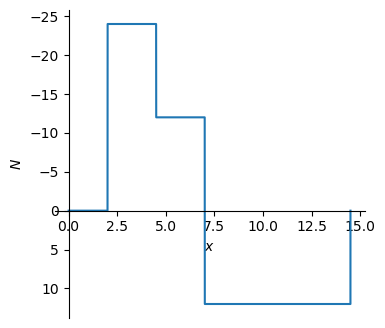

In [11]:
N_np = sym.lambdify(x, N.subs(sol).subs(EI,ei).subs(EA,ea).rewrite(sym.Piecewise))
display(N.subs(sol).subs(EI,ei).subs(EA,ea))

for i in range(len(ab)):
    display(f'N({ab[i]:.1f}) = {N.subs(x,ab[i]).subs(sol).subs(EI,ei).subs(EA,ea)+dx}')

plt.figure(figsize=(4,4))
plt.plot(x_np,N_np(x_np))
plt.xlabel('$x$')
plt.ylabel('$N$');
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.invert_yaxis()

-360.0*SingularityFunction(x, 0, -1) + 60.0*SingularityFunction(x, 0, 0) + 80.0*SingularityFunction(x, 2, -1) - 28.0*SingularityFunction(x, 2, 0) + 40.0*SingularityFunction(x, 4.5, -1) - 16.0*SingularityFunction(x, 4.5, 0) - 16.0*SingularityFunction(x, 7, 0) + 1276.4*SingularityFunction(x, 7.0, -3) + 350.0*SingularityFunction(x, 7.0, -2) - 80.0*SingularityFunction(x, 7.0, -1) + 16.0*SingularityFunction(x, 7.0, 0) - 16.0*SingularityFunction(x, 12, 0) + 3072.4*SingularityFunction(x, 12.0, -3) - 100.0*SingularityFunction(x, 12.0, -2) - 40.0*SingularityFunction(x, 12.0, -1) + 16.0*SingularityFunction(x, 12.0, 0) - 16.0*SingularityFunction(x, 14.5, 0)

'V(0.0) = 0.00'

'V(2.0) = 60.00'

'V(4.5) = 32.00'

'V(7.0) = 16.00'

'V(7.0) = 0.00'

'V(12.0) = 16.00'

'V(12.0) = 0.00'

'V(14.5) = 16.00'

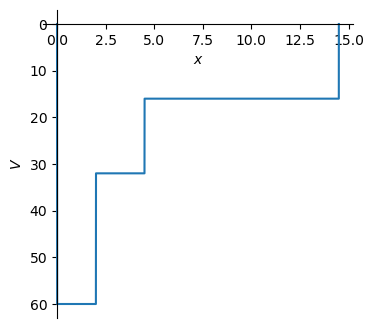

In [12]:
V_np = sym.lambdify(x, V.subs(sol).subs(EI,ei).subs(EA,ea).rewrite(sym.Piecewise))
display(V.subs(sol).subs(EI,ei).subs(EA,ea))

for i in range(len(ab)):
    display(f'V({ab[i]:.1f}) = {V.subs(x,ab[i]-dx).subs(sol).subs(EI,ei).subs(EA,ea)+dx:.2f}')

plt.figure(figsize=(4,4))
plt.plot(x_np,V_np(x_np))
plt.xlabel('$x$')
plt.ylabel('$V$');
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.invert_yaxis()

'M(0) = -360.000000000000'

'M(2) = -160.000000000000'

'M(4.5) = -40.0000000000000'

'M(7) = 0'

'M(7.000000000000004) = oo'

'M(12) = -7.10542735760100E-14'

'M(12.000000000000004) = nan'

'M(14.5) = -1.27897692436818E-13'

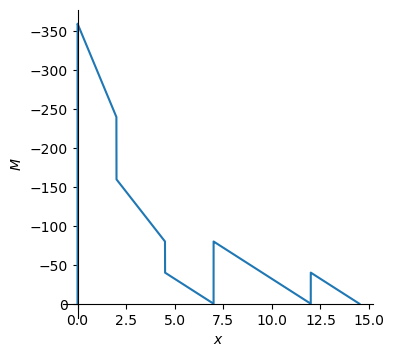

In [13]:
M_np = sym.lambdify(x, M.subs(sol).subs(EI,ei).subs(EA,ea).rewrite(sym.Piecewise))

for i in range(len(ab)):
    display(f'M({ab[i]}) = {M.subs(x,ab[i]).subs(sol).subs(EI,ei).subs(EA,ea)}')

plt.figure(figsize=(4,4))
plt.plot(x_np,M_np(x_np))
plt.xlabel('$x$')
plt.ylabel('$M$');
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.invert_yaxis()

'uv(0.0) = 0.0000 [m]'

'uv(2.0) = 0.0640 [m]'

'uv(4.5) = 0.2209 [m]'

'uv(7.0) = 0.4094 [m]'

'uv(7.0) = 0.0640 [m]'

'uv(12.0) = 0.3609 [m]'

'uv(12.0) = 0.2209 [m]'

'uv(14.5) = 0.4094 [m]'

'uh(0.0) = 0.0000 [m]'

'uh(2.0) = 0.0000 [m]'

'uh(4.5) = 0.1102 [m]'

'uh(7.0) = 0.2478 [m]'

'uh(7.0) = 0.0000 [m]'

'uh(12.0) = -0.2152 [m]'

'uh(12.0) = 0.1102 [m]'

'uh(14.5) = -0.0274 [m]'

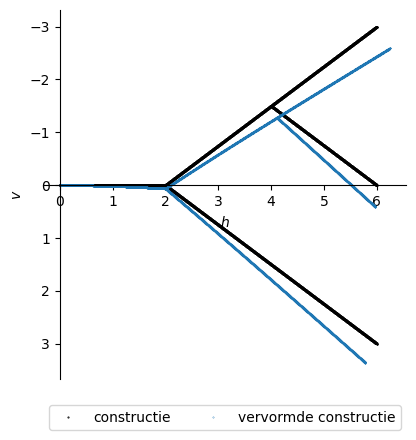

In [14]:
v_np = sym.lambdify(x, v.subs(sol2).rewrite(sym.Piecewise))
h_np = sym.lambdify(x, h.subs(sol2).rewrite(sym.Piecewise))

uv_np = sym.lambdify(x, uv.subs(sol).subs(EI,ei).subs(EA,ea).rewrite(sym.Piecewise))
uh_np = sym.lambdify(x, uh.subs(sol).subs(EI,ei).subs(EA,ea).rewrite(sym.Piecewise))

#display(uv.subs(sol))
for i in range(len(ab)):
    display(f'uv({ab[i]:.1f}) = {uv.subs(x,ab[i]).subs(sol).subs(EI,ei).subs(EA,ea)+dx:.4f} [m]')

for i in range(len(ab)):
    display(f'uh({ab[i]:.1f}) = {uh.subs(x,ab[i]).subs(sol).subs(EI,ei).subs(EA,ea)+dx:.4f} [m]')

plt.figure()
plt.plot(h_np(x_np),v_np(x_np), marker='.',markersize=1, linewidth=0, color='black', label='constructie')
plt.plot((h_np(x_np)+uh_np(x_np)),(v_np(x_np)+uv_np(x_np)), marker='.',markersize=0.5, linewidth=0, label='vervormde constructie')
plt.xlabel('$h$')
plt.ylabel('$v$');
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.invert_yaxis()
plt.axis('scaled')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=False, ncol=3);